# Zero-base ML Project

## 데이터

- 데이콘에 있는 고객 대출등급 분류 데이터 사용
- https://dacon.io/competitions/official/236214/overview/description


- 데이터 칼럼 설명

칼럼명|설명
-|-
ID|대출 고객의 고유 ID
대출금액| 고객의 대출금액
대출기간| 36개월, 60개월
근로기간| 0년차 ~ 10년차 이상으로 구분
주택소유상태| MORTGAGE, RENT, OWN, ANY
연간소득| 고객의 연 소득
부채_대비_소득_비율| 산출방식 존재 x, 원천데이터 값
총계좌수| 고객 보유 계좌 수
대출목적| 12가지 범주
최근_2년간_연체_횟수| 고객의 2년간 연체 횟수
총상환원금| 고객의 총 상환원금
총상환이자| 고객의 총 상환이자
총연체금액| 고객이 연체한 대출의 총 금액
연체계좌수| 고객이 연제한 대출의 계좌 수
대출등급| 예측 목표

## 프로젝트 주제

    * 고객 정보 기반 대출등급 예측 AI 모델 개발

## 기획 미팅 피드백

- 대출 등급 분류의 경우, 대출을 받기 전 대출 등급인지 / 대출을 받은 후 대출 등급인지 확인할 필요가 있음

- 총연체금액 칼럼이 기존 연체금액이 있는 상태에서 대출을 받은 건지, 대출을 받은 후 연체가 발생한 건지 확인 필요

===========================================================================

- 피드백에 대한 데이콘 답변: 확인 불가능
- 피드백에 대한 의견
    - 데이터의 본 목적은 데이터에 존재하는 컬럼을 이용해 고객의 대출등급을 확인하는 것이므로 대출금액, 대출기간, 대출목적, 대출등급 칼럼을 제외한 나머지 칼럼은 이미 기존에 존재하는 과거의 자료, 즉 새로운 대출에 대한 내용이 아닌 기존 대출에 대한 칼럼.
    - 첫번째 피드백에 대한 의견 : 대출 등급 분류의 경우에는 이번에 새로운 대출을 받기 위해 산정하는 대출 등급
    - 두번째 피드백에 대한 의견 : 총연체금액 칼럼은 기존 대출에서 발생한 연체금액

===========================================================================

## 중간 미팅 피드백

- 기획 미팅 피드백 관련 -> 데이터 문의사항은 일단 그대로 진행하고, 추후 문제 발생 시 검토해도 됨

- 근로기간 Unknown 관련

    - KNN Imputer을 통해 대체된 값들이 어떤 값인지 설명을 해줘야 함. Imputer 사용 전 데이터 분포와 사용 후 데이터 분포를 비교함으로써 데이터 변환에 대한 설득력/논리를 갖춰야 함. > 근로기간 feature의 영향을 파악

    - 군집도 한 번 써 봐라. 근로기간을 제외하고 군집화를 사용해서 근로기간이 Unknown인 데이터의 분포를 확인함으로써 Unknown에 대한 인사이트 도출

    - 근로기간 빼고 주성분 두 개만 정도 설정해서 PCA도 해 봐라. 군집 중심들이 뭔가 보인다면, 근로기간 Unknown인 데이터에 대해 힌트를 얻을 수 있을지도.

위와 같은 분석을 통해 금융데이터의 결측치 해소 방안/모델 개발을 주제로 프로젝트를 진행할 수도 있음

===========================================================================

-----

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul
import warnings
warnings.filterwarnings('ignore')

Hangul OK in your Windows!!!


In [2]:
train = pd.read_csv('./train.csv')
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [5]:
train['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

ANY를 처리해줘야 하는데, 데이터가 하나밖에 없으므로 그냥 삭제

In [6]:
train = train[train['주택소유상태'] != 'ANY']

In [7]:
train['대출기간'].value_counts()

대출기간
 36 months    64478
 60 months    31815
Name: count, dtype: int64

대출기간이 36개월, 60개월 두개만 존재하므로 수치형으로 미리 변환

편의상 '년' 으로 변환

In [8]:
val = dict({
    ' 36 months' : 3,
    ' 60 months' : 5
})

train['대출기간'] = train['대출기간'].replace(val)

train['대출기간'].value_counts()

대출기간
3    64478
5    31815
Name: count, dtype: int64

In [9]:
train['근로기간'].value_counts()

근로기간
10+ years    31584
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

근로 기간 10년 이상이 다른 데이터 보다 압도적으로 많다.

후에 분석할 때 유의해서 판단해야 할 듯

EX) 대출등급 A가 근로기간 10년 이상인 사람이 많이 나왔다고 유의미한가 ? -> 단순히 데이터가 많아서 그럴수도 있다는 점

근로기간에 Unknown 값이 존재하는데, 이것을 결측치로 볼지 사용할지 결정해야 한다.

Unknown이 비재직자를 의미하는 걸까?

In [ ]:
train[train['근로기간'] == 'Unknown'].head(10)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
4,TRAIN_00004,18000000,5,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
14,TRAIN_00014,4320000,3,Unknown,OWN,18000000,16.00,22,신용 카드,0,305964,116076.0,0.0,0.0,B
18,TRAIN_00018,12000000,3,Unknown,MORTGAGE,25200000,36.57,20,부채 통합,0,554196,259344.0,0.0,0.0,C
19,TRAIN_00019,15900000,3,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
20,TRAIN_00020,4200000,3,Unknown,MORTGAGE,96000000,7.23,21,소규모 사업,0,94068,70212.0,0.0,0.0,C
30,TRAIN_00030,6000000,3,Unknown,RENT,30240000,9.12,12,부채 통합,0,417864,177504.0,0.0,0.0,C
32,TRAIN_00032,21000000,5,Unknown,MORTGAGE,60000000,13.32,17,부채 통합,0,530748,363000.0,0.0,0.0,B
43,TRAIN_00043,7200000,3,Unknown,MORTGAGE,100800000,1.69,7,기타,0,164148,73812.0,0.0,0.0,C
89,TRAIN_00089,6000000,3,Unknown,MORTGAGE,58800000,14.80,21,기타,0,451776,88032.0,0.0,0.0,A
92,TRAIN_00092,32280000,5,Unknown,MORTGAGE,84960000,28.59,27,부채 통합,1,257040,685668.0,0.0,0.0,G


Unknown인 데이터 상위 10개를 찍어서 확인해보니 대출등급도 A부터 G까지 다양했고, 주택소유상태, 연간소득 등 비재직자라고 보기엔 어려운 정보들로 가득했다.

따라서 Unknown != 비재직자 이므로 결측치로 판정, drop 시키는걸로 하자

In [12]:
# Unknown 빼고 모델링 하기 위한 데이터 생성

# train_new = train[train['근로기간'] != 'Unknown']

# train_new.to_csv('train_new.csv', index=False)

-----

라고 생각하고 처음엔 Unknown값을 drop 했으나, 생각해보니 test 데이터에도 Unknown이 존재하고, 의미상 문제보다 예측에 초점을 둔다면 Unknown을 포함시키는게 맞기 때문에..

두가지 방법이 있겠다.

① 아래에서 수치형 변수로 변환할 때 Unknown값도 변환을 같이 진행하거나

② 결측치(Unknown은 비재직자가 아니다)로 판단은 하되 Drop이 아닌 Replace로 방법을 변경하여 진행

-----

< 1 year과 <1 year 는 < 1 year로 합침 / 1 years는 1 year 과 합침 / 3은 3 years와 합침 / 10+years는 10+ years와 합침

In [9]:
train['근로기간'] = train['근로기간'].apply(lambda x: '< 1 year' if '<1 year' in x else x)
train['근로기간'] = train['근로기간'].apply(lambda x: '1 year' if '1 years' in x else x)
train['근로기간'] = train['근로기간'].apply(lambda x: '3 years' if '3' in x else x)
train['근로기간'] = train['근로기간'].apply(lambda x: '10+ years' if '10+years' in x else x)

train['근로기간'].value_counts()

근로기간
10+ years    32480
2 years       8450
< 1 year      8144
3 years       7670
1 year        6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

좀 더 명확하게 근로기간을 표기하기 위해 직접 수치형으로 변경

**분기점 1**

 - Unknown 값을 수치형 변수로 변환 (11)

In [13]:
duration=dict({'Unknown' : 11,
 '10+ years':10,
 '9 years':9,
 '8 years':8,
 '7 years':7,
 '6 years':6,
 '5 years':5,
 '4 years':4,
 '3 years':3,
 '2 years':2,
 '1 year':1,
 '< 1 year':0})

train['근로기간'] = train['근로기간'].replace(duration)

train['근로기간'].value_counts()

근로기간
10    32480
2      8450
0      8144
3      7670
1      6305
11     5671
5      5665
4      5588
8      4888
6      3874
7      3814
9      3744
Name: count, dtype: int64

In [14]:
train['총계좌수'].unique()

array([ 15,  21,  14,  19,  30,  22,  45,  11,  26,  10,  24,  17,  35,
        20,   9,  36,  16,  59,  29,  12,  28,  31,   8,  37,   6,   7,
        13,  25,  46,  18,  42,  32,  63,  38,  43,  23,  39,  33,  27,
        76,   5,  40,  41,  50,  55,  61,  51,  53,  52,  62,  81,  34,
        47,  48,  44,   4,  64,  56,  54,  67,  49,  72,  69,  57,  66,
        73,  65, 101,  58,  85,  86,  97,  60,  71,  70,  78,  75,  68,
        79,  77,  95,  84,  74,  80,  90,  93,  96,  89,  91,  94,  82,
        87, 109, 130, 102, 105,  92,  99, 127, 106,  98,  83, 169, 140,
       151,  88, 125, 112, 110], dtype=int64)

In [15]:
train['대출목적'].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4724
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

In [16]:
train['대출등급'].value_counts()

대출등급
B    28817
C    27622
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

In [17]:
train.rename(columns={'최근_2년간_연체_횟수' : '최근2년간연체횟수',
                      '부채_대비_소득_비율' : '부채대비소득비율'},inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96293 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         96293 non-null  object 
 1   대출금액       96293 non-null  int64  
 2   대출기간       96293 non-null  int64  
 3   근로기간       96293 non-null  int64  
 4   주택소유상태     96293 non-null  object 
 5   연간소득       96293 non-null  int64  
 6   부채대비소득비율   96293 non-null  float64
 7   총계좌수       96293 non-null  int64  
 8   대출목적       96293 non-null  object 
 9   최근2년간연체횟수  96293 non-null  int64  
 10  총상환원금      96293 non-null  int64  
 11  총상환이자      96293 non-null  float64
 12  총연체금액      96293 non-null  float64
 13  연체계좌수      96293 non-null  float64
 14  대출등급       96293 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 11.8+ MB


In [19]:
train.describe()

,대출금액,대출기간,근로기간,연간소득,부채대비소득비율,총계좌수,최근2년간연체횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629300e+04,96293.000000,96293.000000,9.629300e+04,96293.000000,96293.000000,96293.000000,9.629300e+04,9.629300e+04,96293.000000,96293.000000
mean,1.830376e+07,3.660796,6.301756,9.392673e+07,19.379607,25.304882,0.345685,8.225120e+05,4.282327e+05,54.381149,0.005805
std,1.032887e+07,0.940718,3.803208,9.956923e+07,33.569733,12.088616,0.919123,1.027747e+06,4.402112e+05,1414.776554,0.079967
min,1.200000e+06,3.000000,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,3.000000,3.000000,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,3.000000,7.000000,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870160e+05,0.000000,0.000000
75%,2.400000e+07,5.000000,10.000000,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000
max,4.200000e+07,5.000000,11.000000,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


-----

**분기점 2**

 - 근로기간이 Unknown인 데이터를 KNN Imputer를 이용하여 값 채우기 (수치형변수로 바꾼 결과와 모델링 결과를 비교해보기)

Unknown 값을 결측치로 만들어 준 뒤 KNN Imputer를 이용하여 값 채우기

In [10]:
train2 = pd.read_csv('./train.csv')

train2 = train2[train2['주택소유상태'] != 'ANY']

val = dict({
    ' 36 months' : 3,
    ' 60 months' : 5
})

train2['대출기간'] = train2['대출기간'].replace(val)

train2['대출기간'].value_counts()

train2['근로기간'] = train2['근로기간'].apply(lambda x: '< 1 year' if '<1 year' in x else x)
train2['근로기간'] = train2['근로기간'].apply(lambda x: '1 year' if '1 years' in x else x)
train2['근로기간'] = train2['근로기간'].apply(lambda x: '3 years' if '3' in x else x)
train2['근로기간'] = train2['근로기간'].apply(lambda x: '10+ years' if '10+years' in x else x)

duration=dict({'10+ years':10,
 '9 years':9,
 '8 years':8,
 '7 years':7,
 '6 years':6,
 '5 years':5,
 '4 years':4,
 '3 years':3,
 '2 years':2,
 '1 year':1,
 '< 1 year':0,
 'Unknown' : np.nan})

train2['근로기간'] = train2['근로기간'].replace(duration)

train2['근로기간'].value_counts()

근로기간
10.0    32480
2.0      8450
0.0      8144
3.0      7670
1.0      6305
5.0      5665
4.0      5588
8.0      4888
6.0      3874
7.0      3814
9.0      3744
Name: count, dtype: int64

In [11]:
train2.drop('ID', axis=1, inplace=True)

범주형 변수 -> 수치형 변수로 변환

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train2['주택소유상태'] = le.fit_transform(train2['주택소유상태'])
train2['대출목적'] = le.fit_transform(train2['대출목적'])
train2['대출등급'] = le.fit_transform(train2['대출등급'])

In [13]:
train2[train2['근로기간'].isnull()]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
4,18000000,5,NaN,2,71736000,25.39,19,8,0,228540,148956.0,0.0,0.0,1
14,4320000,3,NaN,1,18000000,16.00,22,3,0,305964,116076.0,0.0,0.0,1
18,12000000,3,NaN,0,25200000,36.57,20,1,0,554196,259344.0,0.0,0.0,2
19,15900000,3,NaN,2,41858400,18.34,9,3,0,0,0.0,0.0,0.0,2
20,4200000,3,NaN,0,96000000,7.23,21,2,0,94068,70212.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96217,31800000,3,NaN,2,79200000,13.16,18,1,0,688080,409332.0,0.0,0.0,3
96241,11130000,3,NaN,1,34800000,7.24,34,10,2,240828,133032.0,0.0,0.0,3
96243,15000000,5,NaN,1,84000000,25.73,28,3,0,679332,754380.0,0.0,0.0,3
96267,8400000,3,NaN,0,69600000,18.73,43,1,0,737556,452304.0,0.0,0.0,3


-----

In [17]:
# knn imputer : n_neighbors=10일 때 기준 모델링을 위한 데이터 생성

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

train2_imputed = imputer.fit_transform(train2)

train_include = pd.DataFrame(train2_imputed, columns=train2.columns)

train_include['근로기간'] = train_include['근로기간'].round()

train_include.to_csv('train_new_imputed.csv', index=False)

-----

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

train2_imputed = imputer.fit_transform(train2)

In [25]:
train_include = pd.DataFrame(train2_imputed, columns=train2.columns)
train_include.iloc[[4,14,18,19,20]]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
4,18000000.0,5.0,7.000000,2.0,71736000.0,25.39,19.0,8.0,0.0,228540.0,148956.0,0.0,0.0,1.0
14,4320000.0,3.0,3.333333,1.0,18000000.0,16.00,22.0,3.0,0.0,305964.0,116076.0,0.0,0.0,1.0
18,12000000.0,3.0,4.666667,0.0,25200000.0,36.57,20.0,1.0,0.0,554196.0,259344.0,0.0,0.0,2.0
19,15900000.0,3.0,1.333333,2.0,41858400.0,18.34,9.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
20,4200000.0,3.0,8.000000,0.0,96000000.0,7.23,21.0,2.0,0.0,94068.0,70212.0,0.0,0.0,2.0


KNN Imputer 변환 결과 - 소수점 아래 반올림

In [26]:
train_include['근로기간'] = train_include['근로기간'].round()
train_include.iloc[[4,14,18,19,20]]

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
4,18000000.0,5.0,7.0,2.0,71736000.0,25.39,19.0,8.0,0.0,228540.0,148956.0,0.0,0.0,1.0
14,4320000.0,3.0,3.0,1.0,18000000.0,16.00,22.0,3.0,0.0,305964.0,116076.0,0.0,0.0,1.0
18,12000000.0,3.0,5.0,0.0,25200000.0,36.57,20.0,1.0,0.0,554196.0,259344.0,0.0,0.0,2.0
19,15900000.0,3.0,1.0,2.0,41858400.0,18.34,9.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
20,4200000.0,3.0,8.0,0.0,96000000.0,7.23,21.0,2.0,0.0,94068.0,70212.0,0.0,0.0,2.0


일단 이 결과는 n_neighbors값을 3으로 지정했을 때인데, 그리드서치나 cross_val_score로 1부터 10까지 n_neighbors 매개변수를 바꿔가면서 최적의 값을 찾아보고 싶었으나,

타깃데이터가 없는 상황이므로 사용이 불가능함.. 따라서 최적의 값을 찾는것은 불가능하다고 생각했는데.. 그냥 노가다로 진행하기로 함

아래는 그 과정

In [27]:
import time

start = time.time()

from sklearn.impute import KNNImputer

imputer = KNNImputer()

param_range = np.arange(1, 11)

imputed_data_list = []
for n_neighbors in param_range:
    imputer.set_params(n_neighbors=n_neighbors)
    filled_data = imputer.fit_transform(train2)
    imputed_data_list.append(filled_data)

print(time.time() - start)

KeyboardInterrupt: 

In [ ]:
target_column_dfs = []

# 각 이웃 수에 대해 결측치가 채워진 데이터를 가져와서 2번째 컬럼(근로기간)만 추출하여 데이터프레임으로 변환
for n_neighbors, filled_data in zip(param_range, imputed_data_list):
    target_column_data = filled_data[:, 2]
    target_column_df = pd.DataFrame(target_column_data, columns=[f'n_neighbors_{n_neighbors}'])
    target_column_dfs.append(target_column_df)

for df in target_column_dfs:
    print(df)

       n_neighbors_1
0                6.0
1               10.0
2                5.0
3                8.0
4                6.0
...              ...
96288           10.0
96289           10.0
96290            1.0
96291            5.0
96292           10.0

[96293 rows x 1 columns]
       n_neighbors_2
0                6.0
1               10.0
2                5.0
3                8.0
4                5.5
...              ...
96288           10.0
96289           10.0
96290            1.0
96291            5.0
96292           10.0

[96293 rows x 1 columns]
       n_neighbors_3
0                6.0
1               10.0
2                5.0
3                8.0
4                7.0
...              ...
96288           10.0
96289           10.0
96290            1.0
96291            5.0
96292           10.0

[96293 rows x 1 columns]
       n_neighbors_4
0                6.0
1               10.0
2                5.0
3                8.0
4                7.5
...              ...
96288           10.

일단 이렇게 해서 n_neighbors=1부터 10까지 KNN Imputer를 이용해서 근로기간 Unknown을 채운 결과를 확보함.

이제 여기서 파악해야 하는건 결측치의 변동을 그래프를 통해 확인하는 것

이웃 수에 따라 변동이 크게 줄어드는 지점을 찾으면 이 지점에서부터는 이웃 수를 늘려도 큰 성능 향상이 나타나지 않게 됨

따라서 변동이 크게 줄어드는 지점을 최적의 n_neighbors 값으로 설정하고 최종 모델링 진행

In [ ]:
for i in range(10):
    print(target_column_dfs[i][f'n_neighbors_{i+1}'].round().value_counts())

n_neighbors_1
10.0    34115
2.0      9057
0.0      8797
3.0      8182
1.0      6758
5.0      6030
4.0      5984
8.0      5188
6.0      4144
7.0      4068
9.0      3970
Name: count, dtype: int64
n_neighbors_2
10.0    33197
2.0      9221
0.0      8337
3.0      7931
1.0      6491
4.0      6308
5.0      6197
8.0      5489
6.0      5109
7.0      4108
9.0      3905
Name: count, dtype: int64
n_neighbors_3
10.0    32763
2.0      8869
3.0      8236
0.0      8175
5.0      6581
1.0      6533
4.0      6388
8.0      5419
7.0      4701
6.0      4581
9.0      4047
Name: count, dtype: int64
n_neighbors_4
10.0    32637
2.0      8910
0.0      8159
3.0      8099
4.0      6642
1.0      6422
5.0      6344
8.0      5659
6.0      5121
7.0      4369
9.0      3931
Name: count, dtype: int64
n_neighbors_5
10.0    32549
2.0      8765
3.0      8253
0.0      8149
5.0      6714
4.0      6464
1.0      6401
8.0      5435
6.0      4936
7.0      4629
9.0      3998
Name: count, dtype: int64
n_neighbors_6
10.0    32528
2.

In [ ]:
# Unknown 대체 하기 전 근로기간 별 count
train2['근로기간'].value_counts()

근로기간
10.0    32480
2.0      8450
0.0      8144
3.0      7670
1.0      6305
5.0      5665
4.0      5588
8.0      4888
6.0      3874
7.0      3814
9.0      3744
Name: count, dtype: int64

그래프화 하기 전에 근로기간의 구간 별 개수를 보니 n_neighbors=10일 때, 10년 이상의 수가 32487로 가장 적었다.

이는 결측치를 대체 하기 전 32480개에서 7개 늘은 수치임. 데이터를 생각했을 때 10년 이상의 데이터가 워낙 많기 때문에

결측치를 대체 한 후 10년 이상 데이터가 가장 적게 생성된 n_neighbors=10이 좋다고 생각함 (불균형 해소)

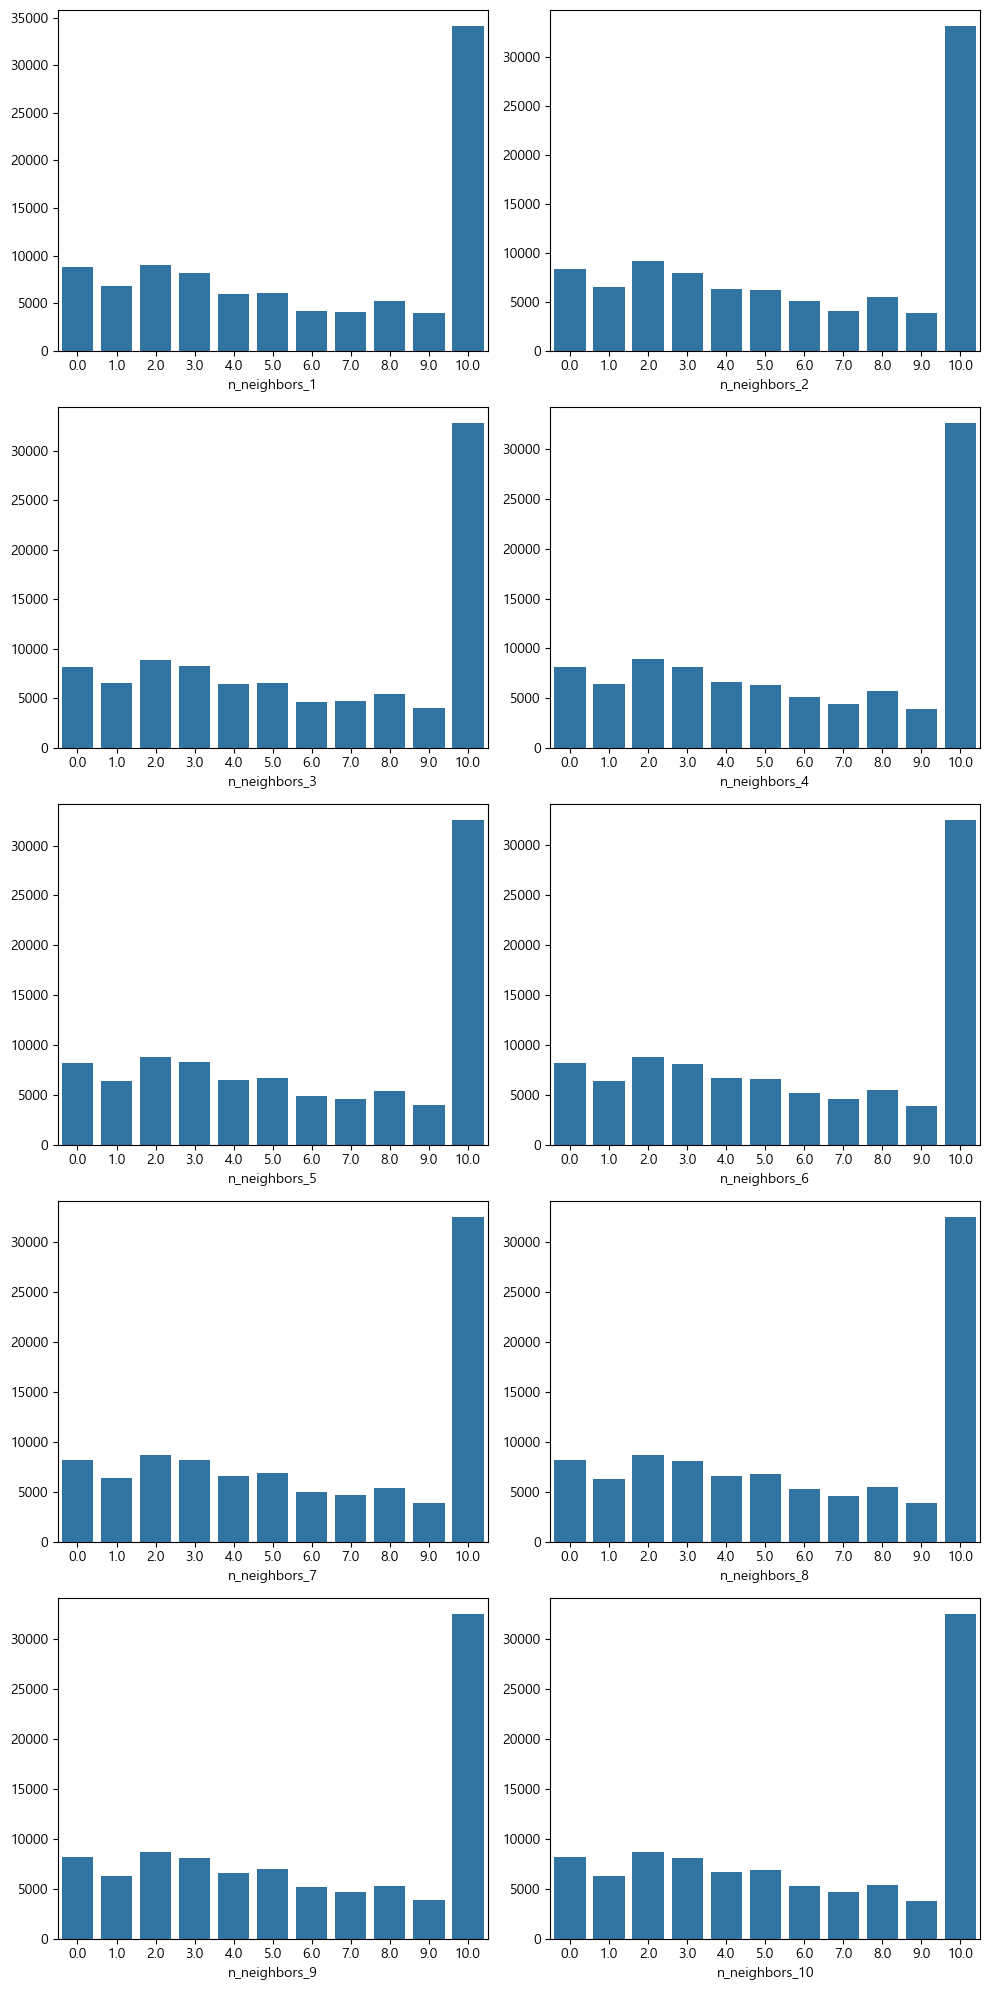

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axs.flat):
    value_counts = target_column_dfs[i][f'n_neighbors_{i+1}'].round().value_counts()
    unique_values = value_counts.index
    unique_counts = value_counts.values

    sns.barplot(x=unique_values, y=unique_counts, ax=ax)

plt.tight_layout()
plt.show()

그렇게 생각하고 10개에 대응하는 그래프를 그려봤는데, Unknown의 수도 데이터의 5%일 뿐더러 골고루 결측치가 채워졌다고 가정하면

사실 육안으로 분포의 변화를 확인하기는 쉽지 않겠지.. 그리고 10년 이상이 워낙 많기 때문에 스케일 때문에 확인하기가 더 어렵고

그럼 이제 남은 방법은

① 내 판단대로(불균형 해소 목적) 10년 이상 데이터 수가 가장 적게 생성된 n_neighbors=10을 모델링에 사용하는 것

② 제일 많이 차이나는 n_neighbors=1도 10년 이상 데이터 1600개 추가 정도면 총 데이터의 1.7% 정도이니 큰 영향이 없을거다. 그러니 n_neighbors=1 부터 10까지 적용한 결과를 전부 모델링에 적용해서 가장 점수가 높은 것을 사용하자

일텐데 일단 모델링 과제에서의 숙제로 남겨두고 넘어가자

-----

## 시각화

In [3]:
import copy
df = copy.deepcopy(train)

In [4]:
df_corr = df.drop(['ID','주택소유상태','대출목적','대출등급'], axis=1)

<Axes: >

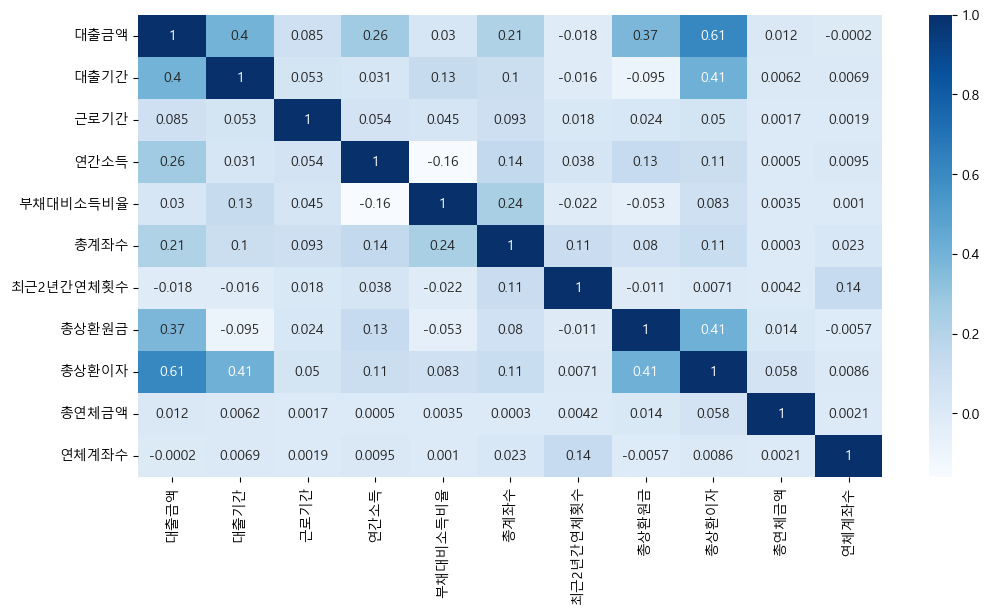

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.heatmap(df_corr.corr(), cmap = 'Blues', annot = True, ax = ax)

수치형 변수들 간의 상관계수를 비교해보니 특별히 집중해볼 구간은 대츨금액-총상환이자,대출기간,총상환원금,연간소득 정도일 것 같다.

1차원적으로 생각해보면 대출금액이 클 수록 상환해야할 이자와 원금도 많을 것이고 대출기간도 그만큼 길 것이다. 더 나아가면 연간소득이 어느정도 보장되어야 큰 대출이 가능하겠지..?

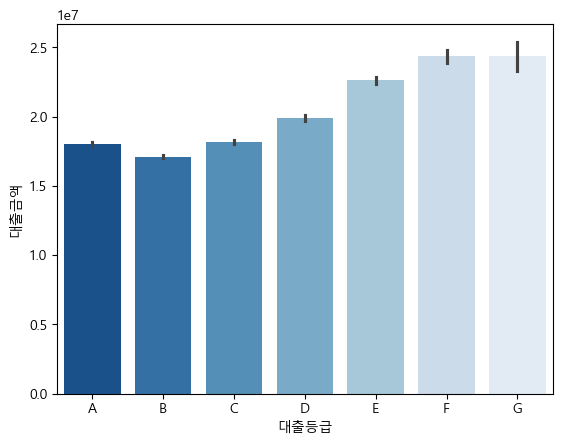

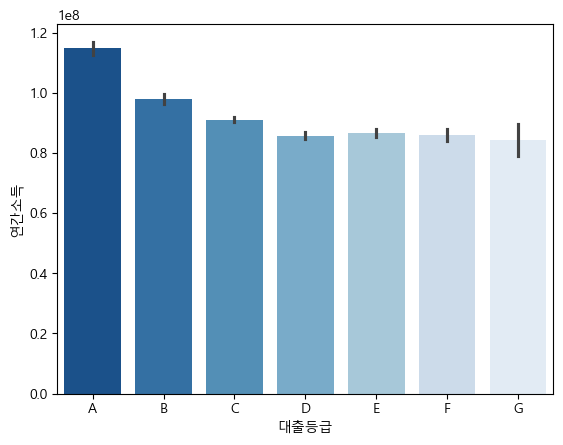

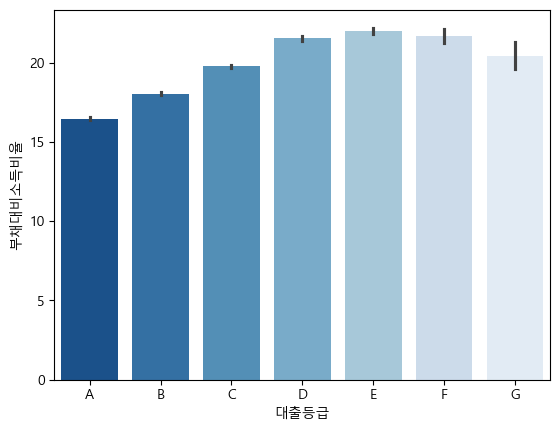

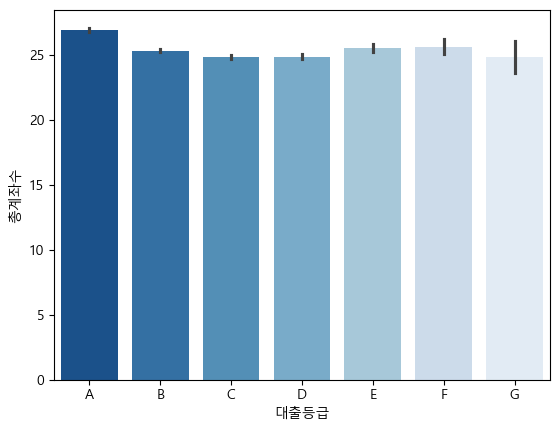

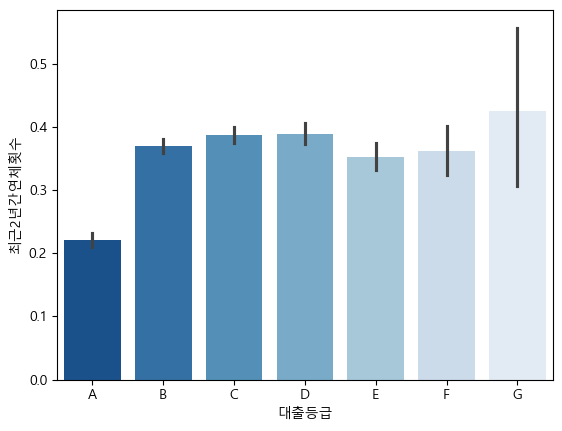

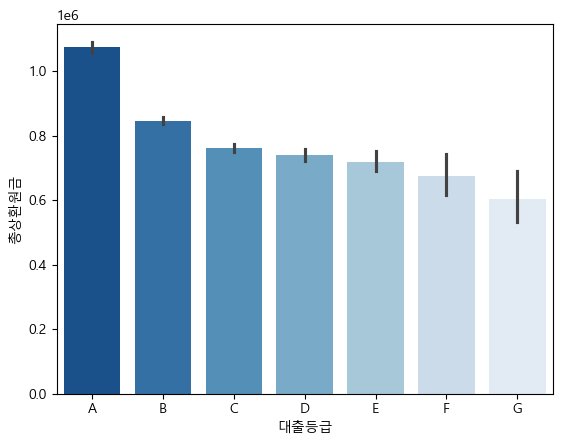

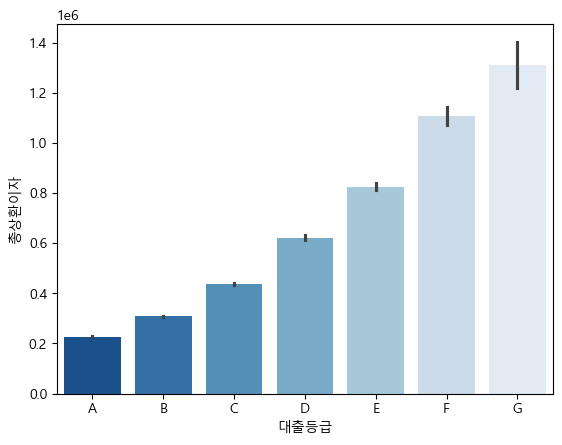

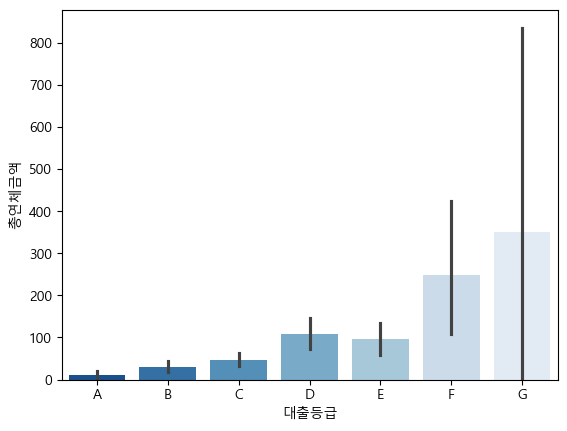

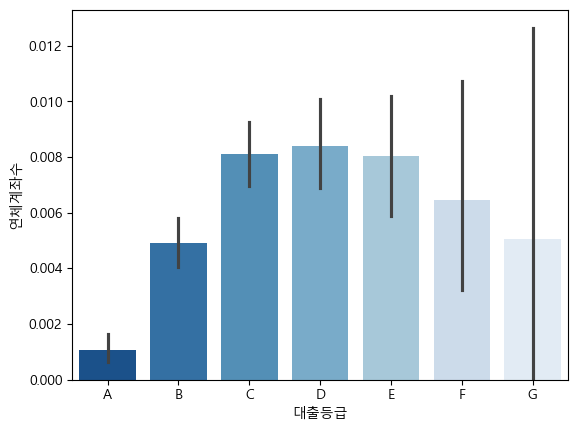

In [ ]:
bar_columns = ['대출금액', '연간소득', '부채대비소득비율', '총계좌수', '최근2년간연체횟수', 
               '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

for i in bar_columns:
    sns.barplot(data = df, x = '대출등급', y = i,  palette = 'Blues_r',   
                order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.show()

- 대출금액이 많을수록 대출등급이 낮은 경향
- 연간소득이 많을수록 대출등급이 높은 경향
- 부채대비소득비율이 높을수록 대출등급이 낮은 경향을 보이지만 E, F, G등급에서는 반대
- 최근2년간연체횟수의 경우 A등급은 월등히 낮은 경향, 나머지는 비슷, 하지만 G등급의 경우 오차막대가 다른 등급에 비해 긴 경향
- 총상환원금이 많을수록 대출등급이 높은 경향
- 총상환이자가 적을수록 대출등급이 높은 경향
=> 기존 총상환원금이 많고 총상환이자가 적을수록 대출등급이 높게 나옴
=> 기존 대출을 받았을 때에도 대출등급이 높게 나와서 대출을 더 많이 받고 등급이 높으니 낮은 이자율로 대출을 할 수 있었던게 아닐까
- 총연체금액이 낮을수록 대출등급이 높은 경향
=> 대출등급이 낮을수록 오차막대가 길어짐
- 연체계좌수는 D등급까지는 증가하다가 감소함. 연체계좌수 역시 등급이 낮아질수록 오차막대가 길어짐

앞서 describe로 본 대출금액의 범위는 120만 ~ 4200만이었다. 천만원대로 구간을 나누어 시각화 해보자

-----

근로기간 unknown 데이터에 대한 pie 차트 시각화

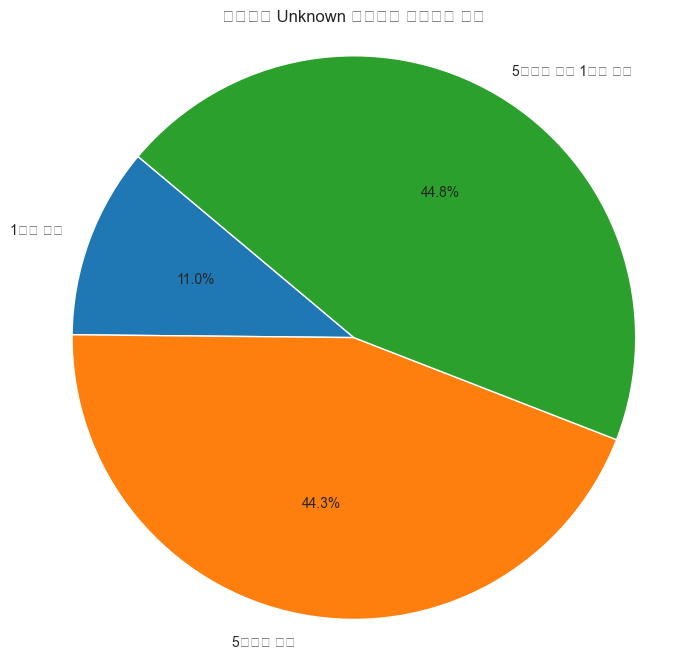

In [7]:
df = train.copy()

df = df[df['근로기간'] == 'Unknown']

def categorize(amount):
    if amount < 50000000:
        return '5천만원 미만'
    elif amount < 100000000:
        return '5천만원 이상 1억원 미만'
    else:
        return '1억원 이상'

df['연간소득'] = df['연간소득'].apply(categorize)

count = df.groupby(['대출등급', '연간소득']).size().reset_index(name='count')
count.drop('대출등급', axis=1, inplace=True)
merged = count.groupby('연간소득')['count'].sum().reset_index()

labels = merged['연간소득'].unique()
sizes = merged['count'].unique()

plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('근로기간 Unknown 데이터의 연간소득 분포')
plt.axis('equal')
plt.show()

프로젝트 막바지 단계에서 추가한 그래프인데.. 갑자기 한글이 깨져서 안나온다 ㅠㅠ

-----

In [20]:
df = train.copy()

count_data = df.groupby(['대출등급', '대출금액']).size().reset_index(name='count')

categories = count_data['대출등급'].unique()
values1 = count_data[count_data['연간소득']=='5천만원 미만']['count']
values2 = count_data[count_data['연간소득']=='5천만원 이상 1억원 미만']['count']
values3 = count_data[count_data['연간소득']=='1억원 이상']['count']

df['연간소득'] = df['연간소득'].apply(categorize2)

count_data = df.groupby(['대출등급', '연간소득']).size().reset_index(name='count')


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
14,TRAIN_00014,4320000,36 months,Unknown,OWN,18000000,16.00,22,신용 카드,0,305964,116076.0,0.0,0.0,B
18,TRAIN_00018,12000000,36 months,Unknown,MORTGAGE,25200000,36.57,20,부채 통합,0,554196,259344.0,0.0,0.0,C
19,TRAIN_00019,15900000,36 months,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
20,TRAIN_00020,4200000,36 months,Unknown,MORTGAGE,96000000,7.23,21,소규모 사업,0,94068,70212.0,0.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96217,TRAIN_96217,31800000,36 months,Unknown,RENT,79200000,13.16,18,부채 통합,0,688080,409332.0,0.0,0.0,D
96241,TRAIN_96241,11130000,36 months,Unknown,OWN,34800000,7.24,34,주택 개선,2,240828,133032.0,0.0,0.0,D
96243,TRAIN_96243,15000000,60 months,Unknown,OWN,84000000,25.73,28,신용 카드,0,679332,754380.0,0.0,0.0,D
96267,TRAIN_96267,8400000,36 months,Unknown,MORTGAGE,69600000,18.73,43,부채 통합,0,737556,452304.0,0.0,0.0,D


In [16]:
def categorize(amount):
    if amount < 20000000 :
        return '2천만원 미만'
    else:
        return '2천만원 이상'

df['대출금액'] = df['대출금액'].apply(categorize)

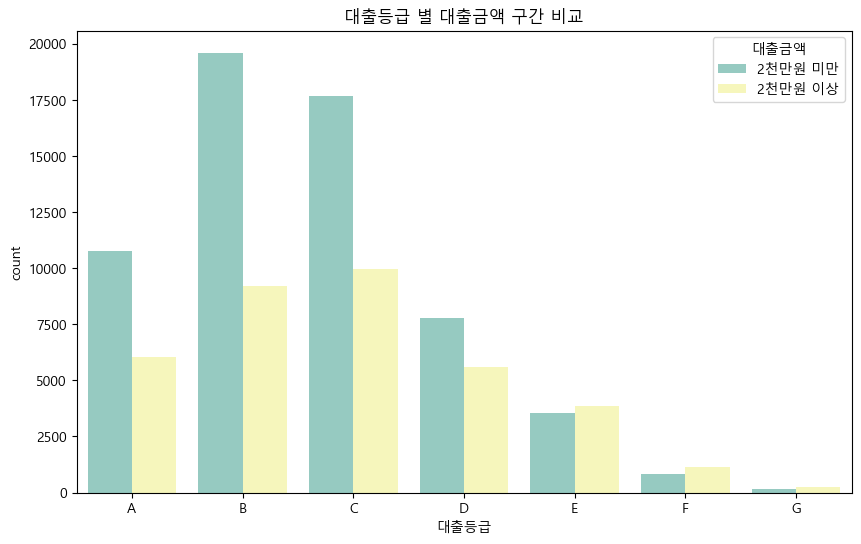

In [17]:
count_data = df.groupby(['대출등급', '대출금액']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='대출금액', data=count_data, palette="Set3")
plt.title(f'대출등급 별 대출금액 구간 비교')
plt.show()

대출등급을 막론하고 대출금액은 주로 천만원이상 ~ 2천만원 미만 / 천만원 미만이 가장 많았다.

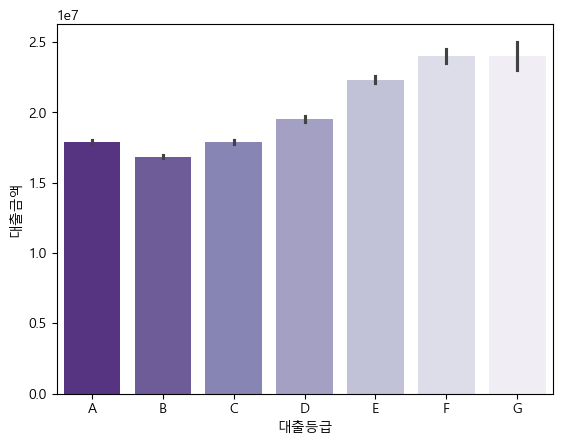

**memo**
- A 등급을 제외하고, 대출 등급이 낮아짐에 따라 대출금액이 증가한다.

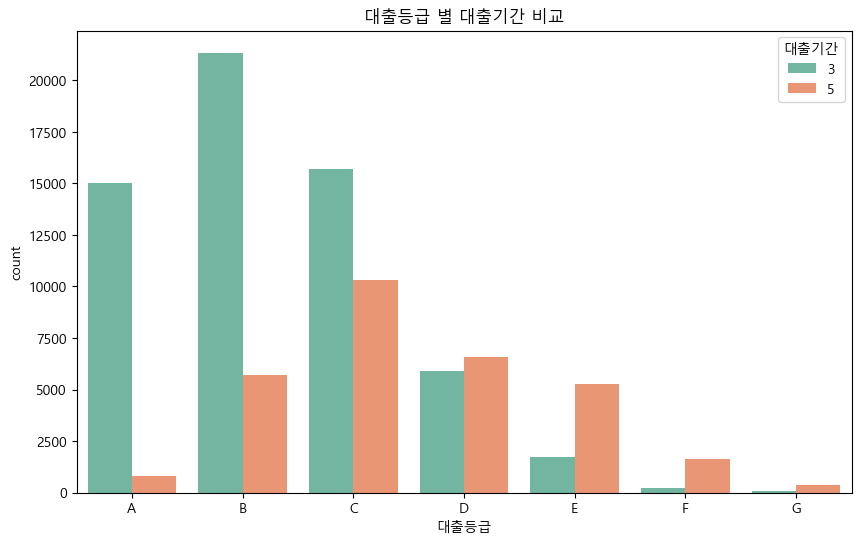

In [ ]:
count_data = df.groupby(['대출등급', '대출기간']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='대출기간', data=count_data, palette="Set2")
plt.title(f'대출등급 별 대출기간 비교')
plt.show()

C등급 까지는 3년짜리 대출이 많았고 D 등급 부터는 5년짜리 대출이 많았다.

* 대출등급이 높은 사람은 상환능력이 좋아서 대출기간이 짧은건지? 아니면 다른 이유가 있는지 ?

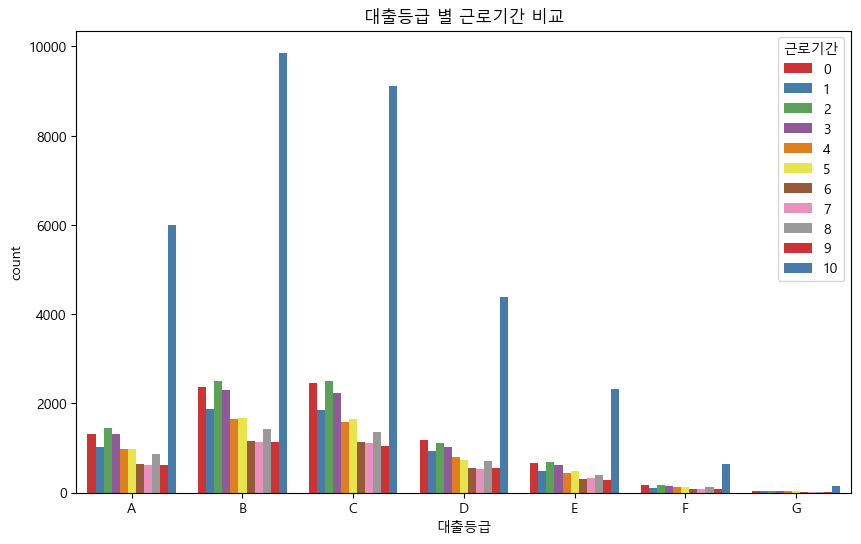

In [ ]:
count_data = df.groupby(['대출등급', '근로기간']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='근로기간', data=count_data, palette="Set1")
plt.title(f'대출등급 별 근로기간 비교')
plt.show()

대출등급을 막론하고 전 구간 10년 이상 근무한 사람이 압도적으로 많았다.

하지만 이 부분도 데이터 불균형의 문제이지 전제 경향을 보면 3년차를 기점으로 줄어드는 경향을 보인다. 

즉, 3년차 이하의 저년차 직장인의 수가 분포에서 많은 부분을 차지한다고 볼 수 있음

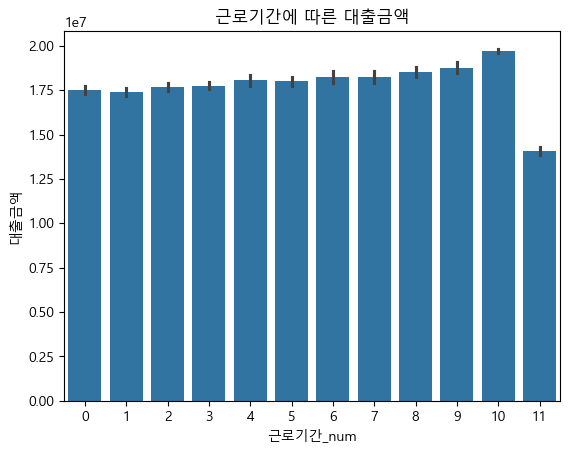

**memo**
- 근로기간이 늘어남에 따라 대출 금액도 상승하는 추세를 보인다.
- 근로기간이 Unknown이었던 11 그룹의 경우, 추세에서 벗어나 있으므로 대출 심사 시 '주부', '무직', '학생' 등으로 분류되는 직업으로 근로 기간이 책정되지 않는 업종일 가능성이 있음.

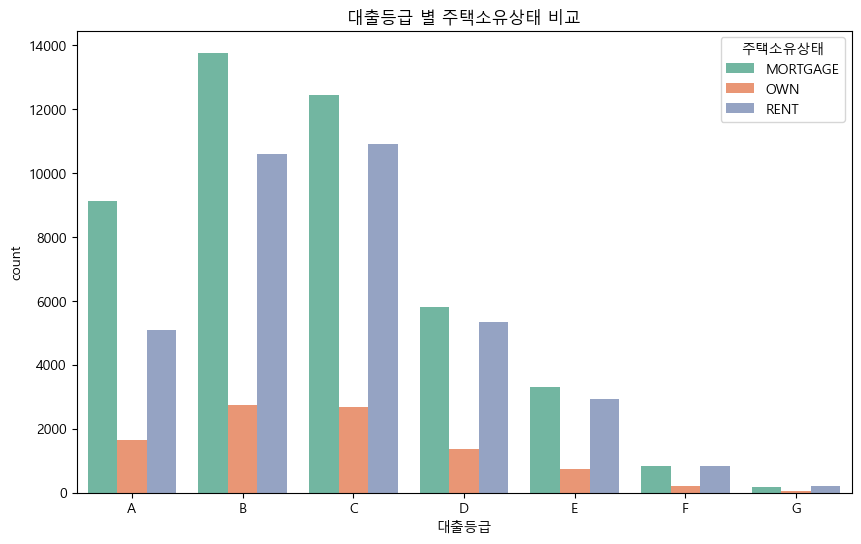

In [ ]:
count_data = df.groupby(['대출등급', '주택소유상태']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='주택소유상태', data=count_data, palette="Set2")
plt.title(f'대출등급 별 주택소유상태 비교')
plt.show()

자가를 소유하는게 이렇게 힘든일이다 !

대출금액과 마찬가지로 앞서 describe로 본 연간소득의 범위는 0원 ~ 100억대였다. 천만원대로 구간을 나누고 1억이상부터는 묶어서 시각화 진행

In [ ]:
def categorize2(amount):
    if amount < 10000000:
        return '천만원 미만'
    elif amount < 20000000:
        return '천만원 이상 2천만원 미만'
    elif amount < 30000000:
        return '2천만원 이상 3천만원 미만'
    elif amount < 40000000:
        return '3천만원 이상 4천만원 미만'
    elif amount < 50000000:
        return '4천만원 이상 5천만원 미만'
    elif amount < 60000000:
        return '5천만원 이상 6천만원 미만'
    elif amount < 70000000:
        return '6천만원 이상 7천만원 미만'
    elif amount < 80000000:
        return '7천만원 이상 8천만원 미만'
    elif amount < 90000000:
        return '8천만원 이상 9천만원 미만'
    elif amount < 100000000:
        return '9천만원 이상 1억원 미만'
    else:
        return '1억원 이상'

df['연간소득'] = df['연간소득'].apply(categorize2)

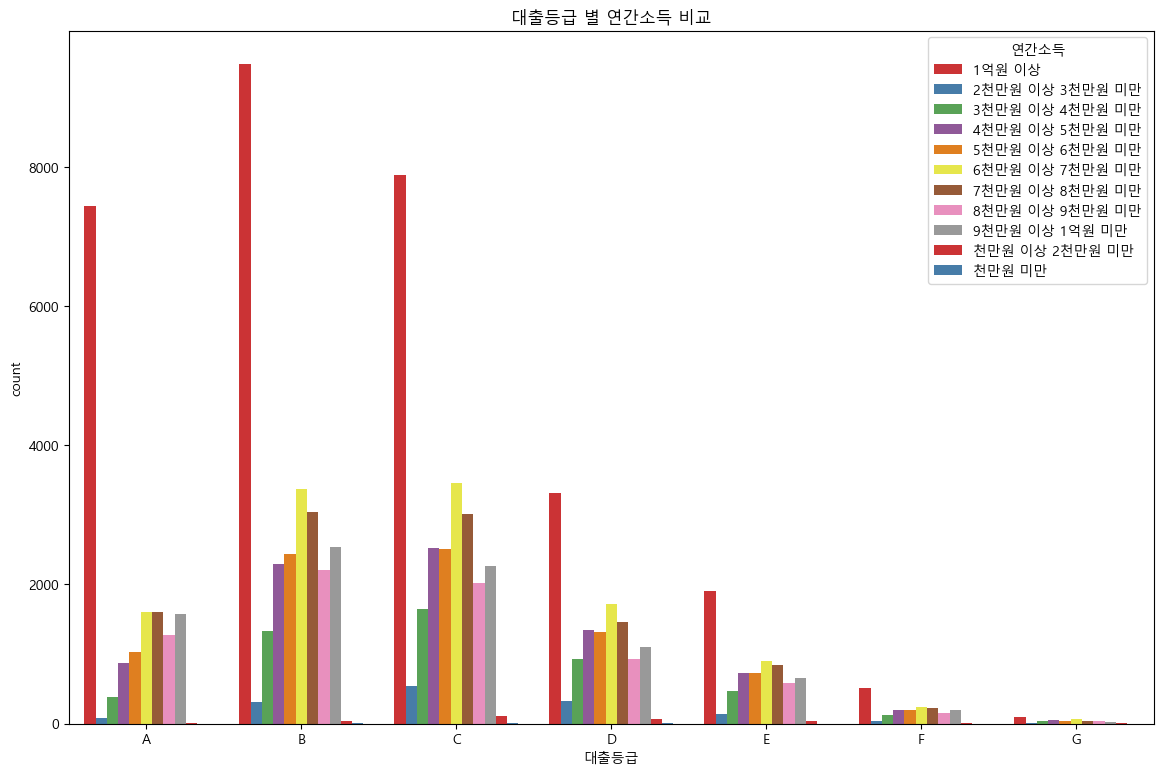

In [ ]:
count_data = df.groupby(['대출등급', '연간소득']).size().reset_index(name='count')

plt.figure(figsize=(14, 9))
sns.barplot(x='대출등급', y='count', hue='연간소득', data=count_data, palette="Set1")
plt.title(f'대출등급 별 연간소득 비교')
plt.show()

어이쿠 우리나라에 억대연봉이 이렇게나 많았나

조건을 변경해서 다시 시각화

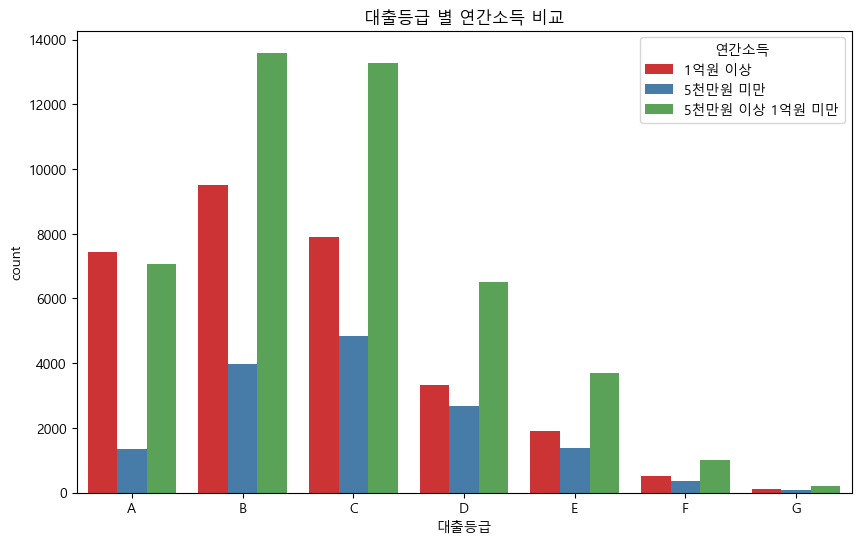

In [ ]:
def categorize2(amount):
    if amount < 50000000:
        return '5천만원 미만'
    elif amount < 100000000:
        return '5천만원 이상 1억원 미만'
    else:
        return '1억원 이상'

df['연간소득'] = df['연간소득'].apply(categorize2)

count_data = df.groupby(['대출등급', '연간소득']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='연간소득', data=count_data, palette="Set1")
plt.title(f'대출등급 별 연간소득 비교')
plt.show()

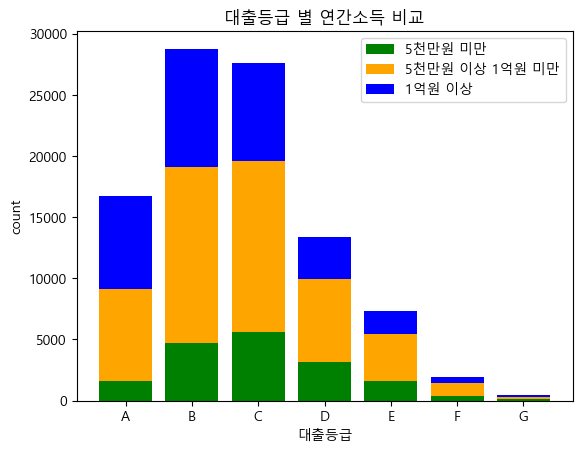

In [59]:
categories = count_data['대출등급'].unique()
values1 = count_data[count_data['연간소득']=='5천만원 미만']['count']
values2 = count_data[count_data['연간소득']=='5천만원 이상 1억원 미만']['count']
values3 = count_data[count_data['연간소득']=='1억원 이상']['count']


plt.bar(categories, values1, label='5천만원 미만', color='g')
plt.bar(categories, values2, bottom=values1, label='5천만원 이상 1억원 미만', color='orange')
plt.bar(categories, values3, bottom=[x + y for x, y in zip(values1, values2)], label='1억원 이상', color='b')

plt.legend()
plt.title('대출등급 별 연간소득 비교')
plt.xlabel('대출등급')
plt.ylabel('count')
plt.show()

In [13]:
df = train.copy()

대출 등급이 낮은 구간에서 연간소득이 낮은 사람들의 대출수가 많을 줄 알았는데 역시 대출도 돈을 잘 벌어야 할 수 있는거였나..

부채대비 소득 비율도 10단위로 잘라서 시각화 해보자

In [ ]:
def categorize3(amount):
    if amount < 10.0:
        return '10 미만'
    elif amount < 20.0:
        return '20 미만'
    elif amount < 30.0:
        return '30 미만'
    elif amount < 40.0:
        return '40 미만'
    else:
        return '40 이상'

df['부채대비소득비율'] = df['부채대비소득비율'].apply(categorize3)

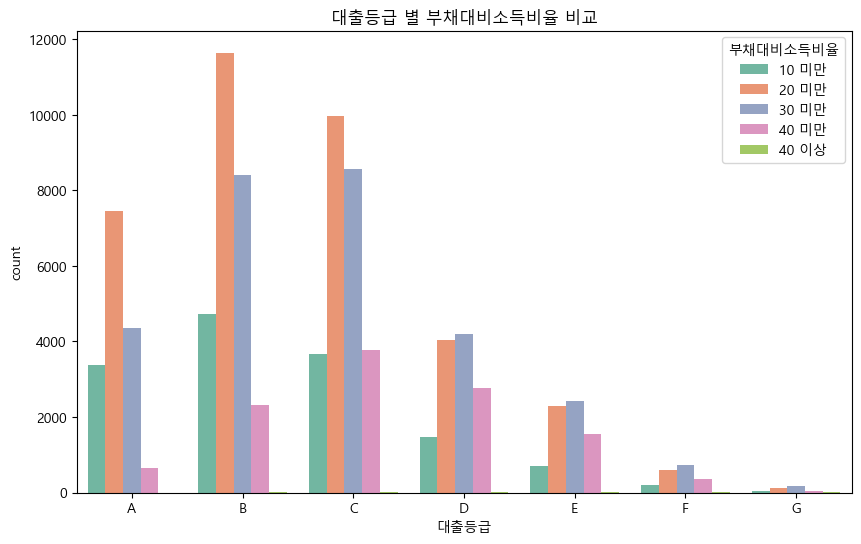

In [ ]:
count_data = df.groupby(['대출등급', '부채대비소득비율']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='부채대비소득비율', data=count_data, palette="Set2")
plt.title(f'대출등급 별 부채대비소득비율 비교')
plt.show()

부채대비소득비율 컬럼의 계산 방식이 연간소득 / ( 대출금액 / 대출기간 ) 인줄 알았으나 실제로 몇개를 계산해보니 틀린 구간이 몇개 있었음 

-> 데이터 문의 결과 해당 값은 원천 데이터에 존재하는 '부채대비소득비율' 값으로 별다른 산출방식이 존재하지 않는 점 참고 부탁드립니다. 라고 함 

전 구간에서 부채대비소득비율은 20미만과 30미만이 가장 많았다.

In [ ]:
def categorize4(amount):
    if amount < 20:
        return '20개 미만'
    elif amount < 40:
        return '40개 미만'
    elif amount < 60:
        return '60개 미만'
    elif amount < 80:
        return '80개 미만'
    else:
        return '80개 이상'

df['총계좌수'] = df['총계좌수'].apply(categorize4)

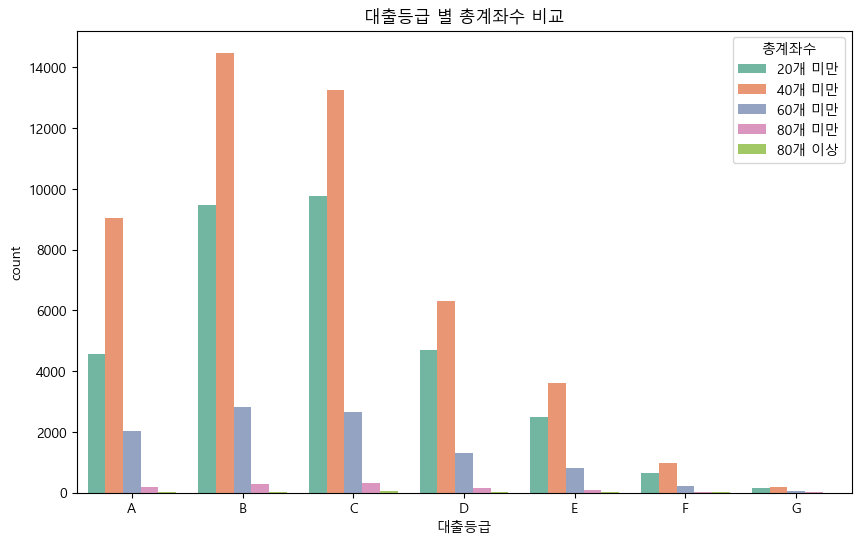

In [ ]:
count_data = df.groupby(['대출등급', '총계좌수']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='대출등급', y='count', hue='총계좌수', data=count_data, palette="Set2")
plt.title(f'대출등급 별 총계좌수 비교')
plt.show()

전 구간에서 총 계좌수는 40개 미만, 20개 미만 순으로 가장 많았다

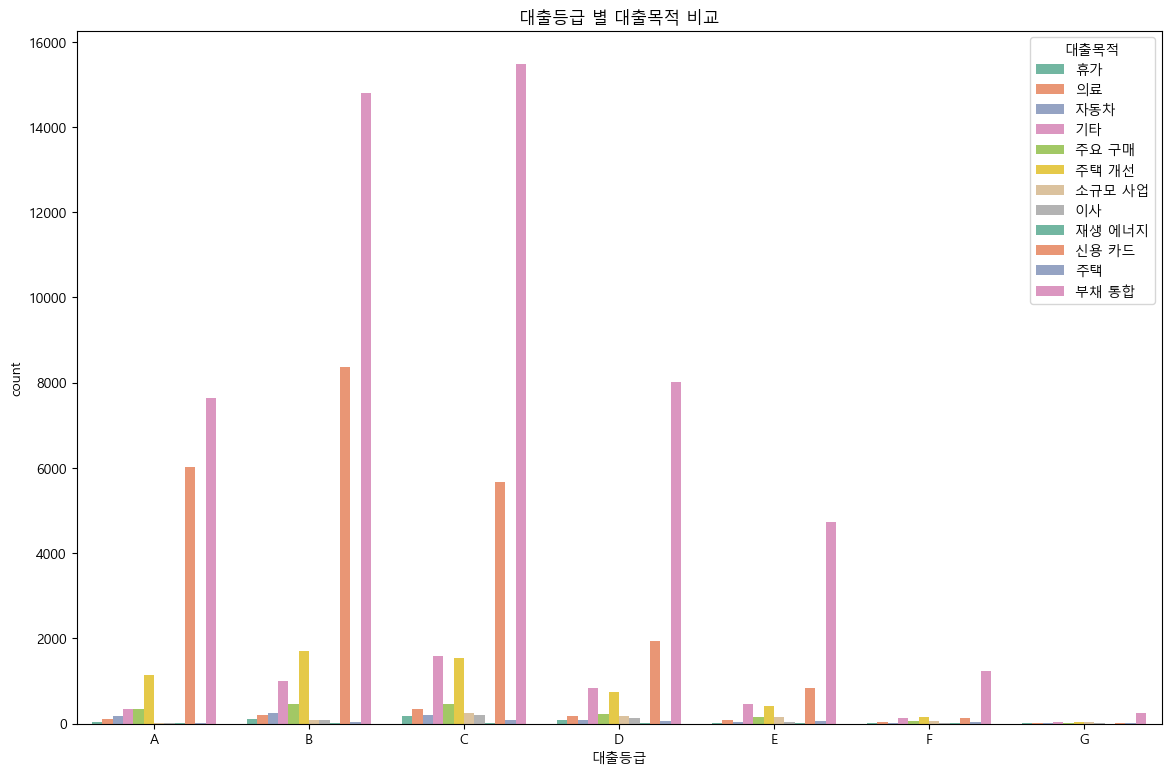

In [ ]:
count_data = df.groupby(['대출등급', '대출목적']).size().reset_index(name='count').sort_values('count', ascending=False).sort_values('대출등급')

plt.figure(figsize=(14, 9))
sns.barplot(x='대출등급', y='count', hue='대출목적', data=count_data, palette="Set2")
plt.title(f'대출등급 별 대출목적 비교')
plt.show()

전 구간 부채 통합 그리고 신용 카드 목적의 대출이 가장 많았다.

※ 부채 통합이란? 여러 부채를 하나의 대출로 결합하는 과정, 이를 통해 손 쉬운계좌 관리 및 이자 절감의 효과를 얻을 수 있다.

In [ ]:
def categorize5(amount):
    if amount == 0:
        return '0번'
    elif amount == 1:
        return '1번'
    else:
        return '2번 이상'

df['최근2년간연체횟수'] = df['최근2년간연체횟수'].apply(categorize5)

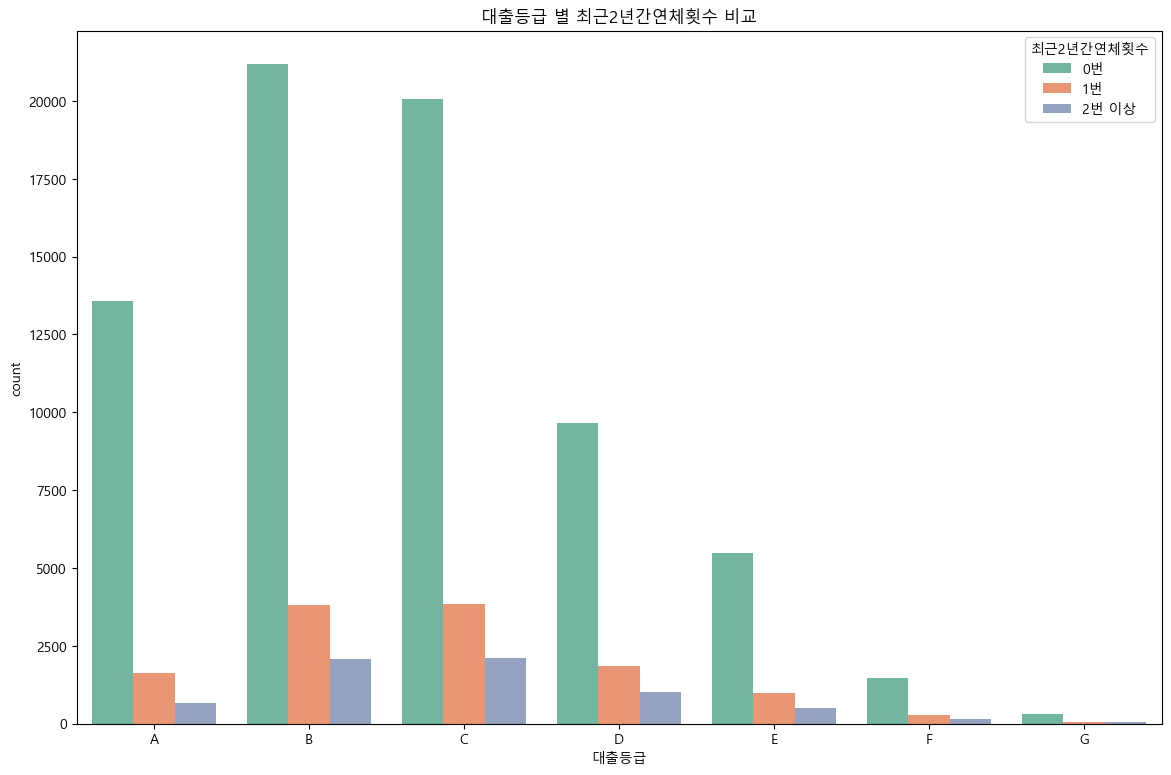

In [ ]:
count_data = df.groupby(['대출등급', '최근2년간연체횟수']).size().reset_index(name='count')

plt.figure(figsize=(14, 9))
sns.barplot(x='대출등급', y='count', hue='최근2년간연체횟수', data=count_data, palette="Set2")
plt.title(f'대출등급 별 최근2년간연체횟수 비교')
plt.show()

사실 이것을 통해 확인해보고 싶었던것은 "대출등급이 낮을수록 연체 횟수가 많을 것이다" 였는데, 데이터의 불균형 때문에 그래프에서 드러나지는 않았다.

대출등급별로 2년간연체횟수 묶어서 비율 계산해보자.......

In [ ]:
cd1 = count_data.groupby('대출등급')['count'].sum().to_frame()
cd1

,count
대출등급,
A,15838
B,27075
C,25994
D,12482
E,6976
F,1862
G,395


In [ ]:
def categorize6(amount):
    if amount == '0번':
        return 0
    else:
        return 1

count_data['최근2년간연체횟수'] = count_data['최근2년간연체횟수'].apply(categorize6)

1번 이상 연체한 고객을 대상으로 비율 측정

In [ ]:
cd2 = count_data.groupby(['대출등급', '최근2년간연체횟수']).sum()

In [ ]:
rates = []

for i in range(len(cd1)):
    rate = cd2.iloc[i*2+1] / cd1.iloc[i]
    rates.append(rate)

rates = [s.iloc[0] for s in rates]
rates

[0.1437681525445132,
 0.21680517082179132,
 0.2283219204431792,
 0.22736740906905945,
 0.21387614678899083,
 0.22073039742212675,
 0.21518987341772153]

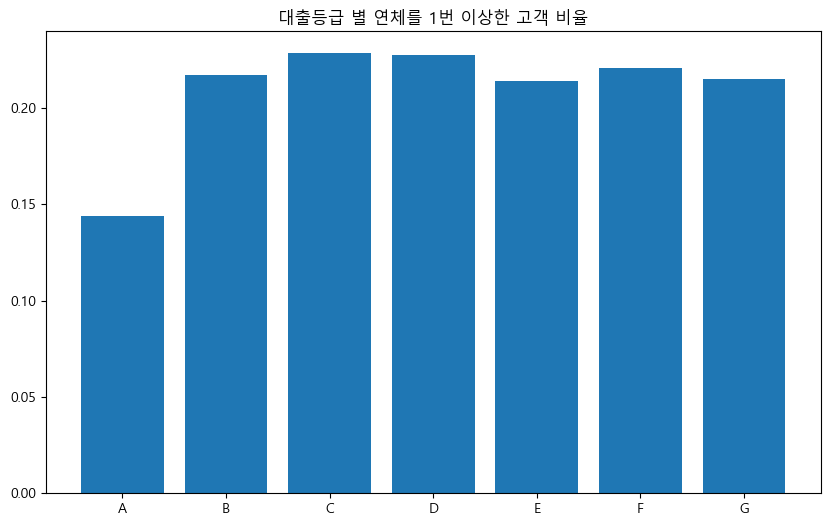

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(x=count_data['대출등급'].unique(), height=rates)
plt.title(f'대출등급 별 연체를 1번 이상한 고객 비율')
plt.show()

A 등급을 제외하고 대부분 20% 이상 비율로 고객이 연체를 한 것을 알 수 있다.

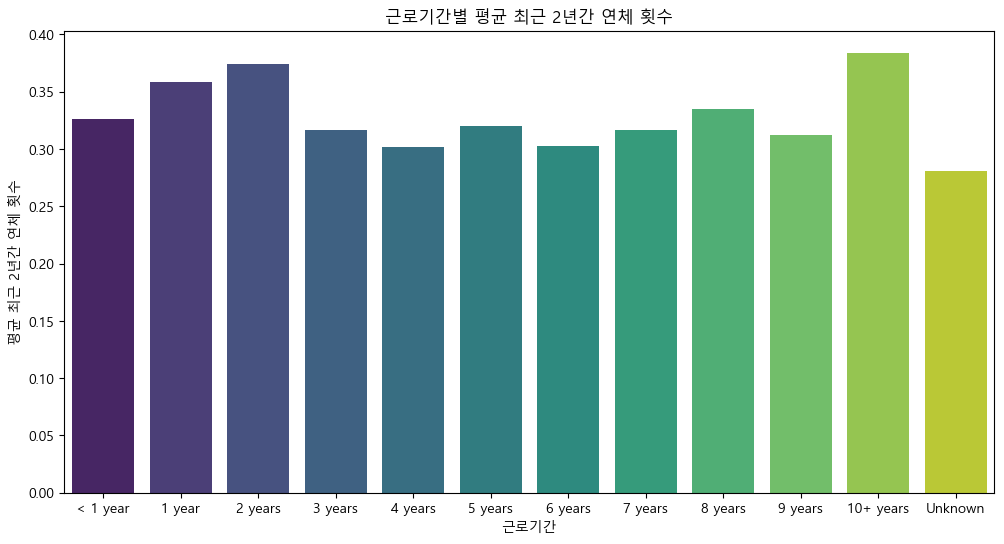

++ 근로기간별 최근2년간연체횟수 평균

상대적으로 저년차 그룹에서 연체횟수의 평균이 높게 나왔다. 그리고 10년 이상 근로자에서 높게 나오는데, 이는 데이터 불균형 문제로 생각됨

-----